In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Replacing Blanks with 0 as tenure is 0  and no total charges are recorded

In [6]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [11]:
df.isnull().sum().sum()

np.int64(0)

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
df["customerID"].duplicated().sum()

np.int64(0)

In [18]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


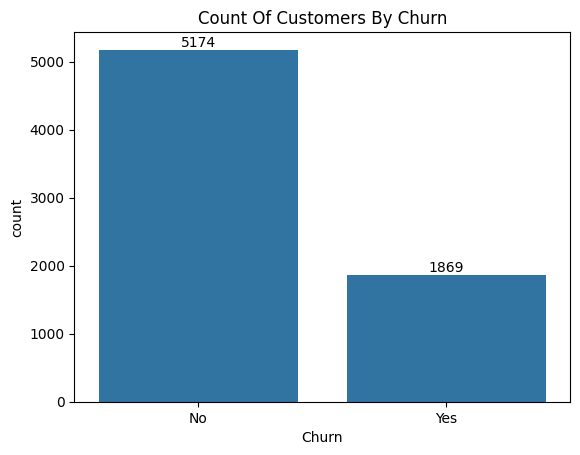

In [31]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count Of Customers By Churn")
plt.show()

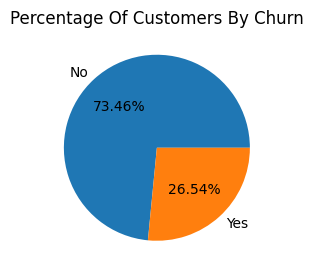

In [32]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage Of Customers By Churn")
plt.show()

#From the given pie chart we can conclude that 26.54% of our customers have churend out.
#Now let's explore the reason behind it.

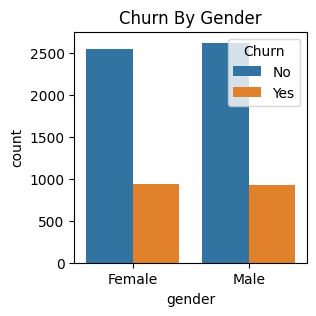

In [42]:
plt.figure(figsize = (3,3))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn By Gender")
plt.show()

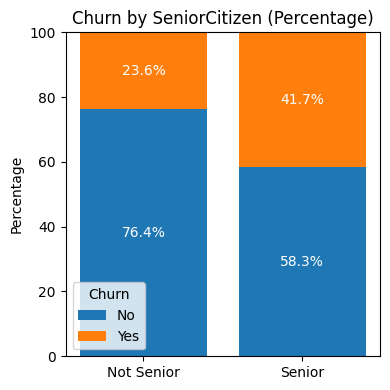

In [46]:
# Step 1: Calculate counts
count_data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Step 2: Convert to percentages
percent_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Step 3: Plot
plt.figure(figsize=(4,4))
bars1 = plt.bar(percent_data.index, percent_data['No'], label='No')
bars2 = plt.bar(percent_data.index, percent_data['Yes'], bottom=percent_data['No'], label='Yes')

# Step 4: Add percentage labels
for i in percent_data.index:
    no_pct = percent_data.loc[i, 'No']
    yes_pct = percent_data.loc[i, 'Yes']
    
    plt.text(i, no_pct / 2, f'{no_pct:.1f}%', ha='center', va='center', color='white')
    plt.text(i, no_pct + yes_pct / 2, f'{yes_pct:.1f}%', ha='center', va='center', color='white')

# Step 5: Formatting
plt.xticks([0, 1], ['Not Senior', 'Senior'])
plt.title('Churn by SeniorCitizen (Percentage)')
plt.ylabel('Percentage')
plt.legend(title='Churn')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

#Compatively a grater percentage of people in senior citizen category have chured.

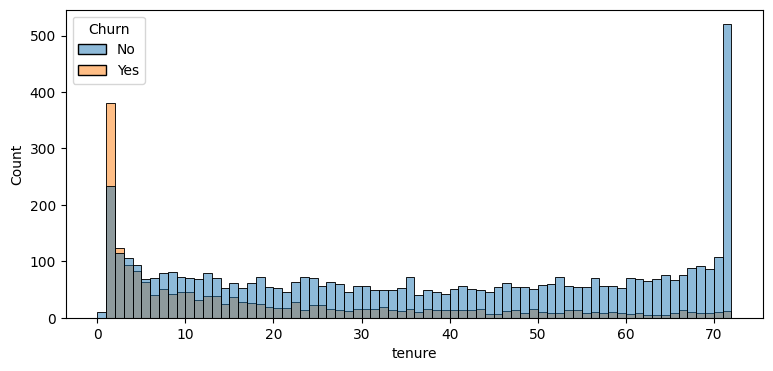

In [52]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

#People who have used our services for a long time have stayed and people who used our services for 1 or 2 months have churned

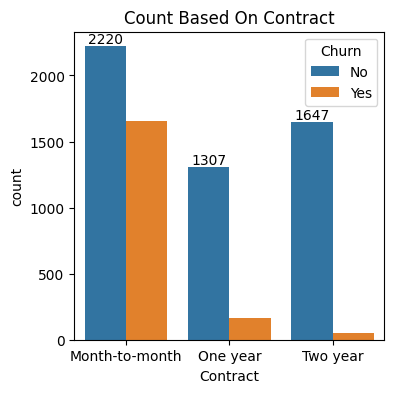

In [54]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count Based On Contract")
plt.show()

#People who havw month to month contract are likely to churn then from those who have 1 or 2 years of contract

In [55]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

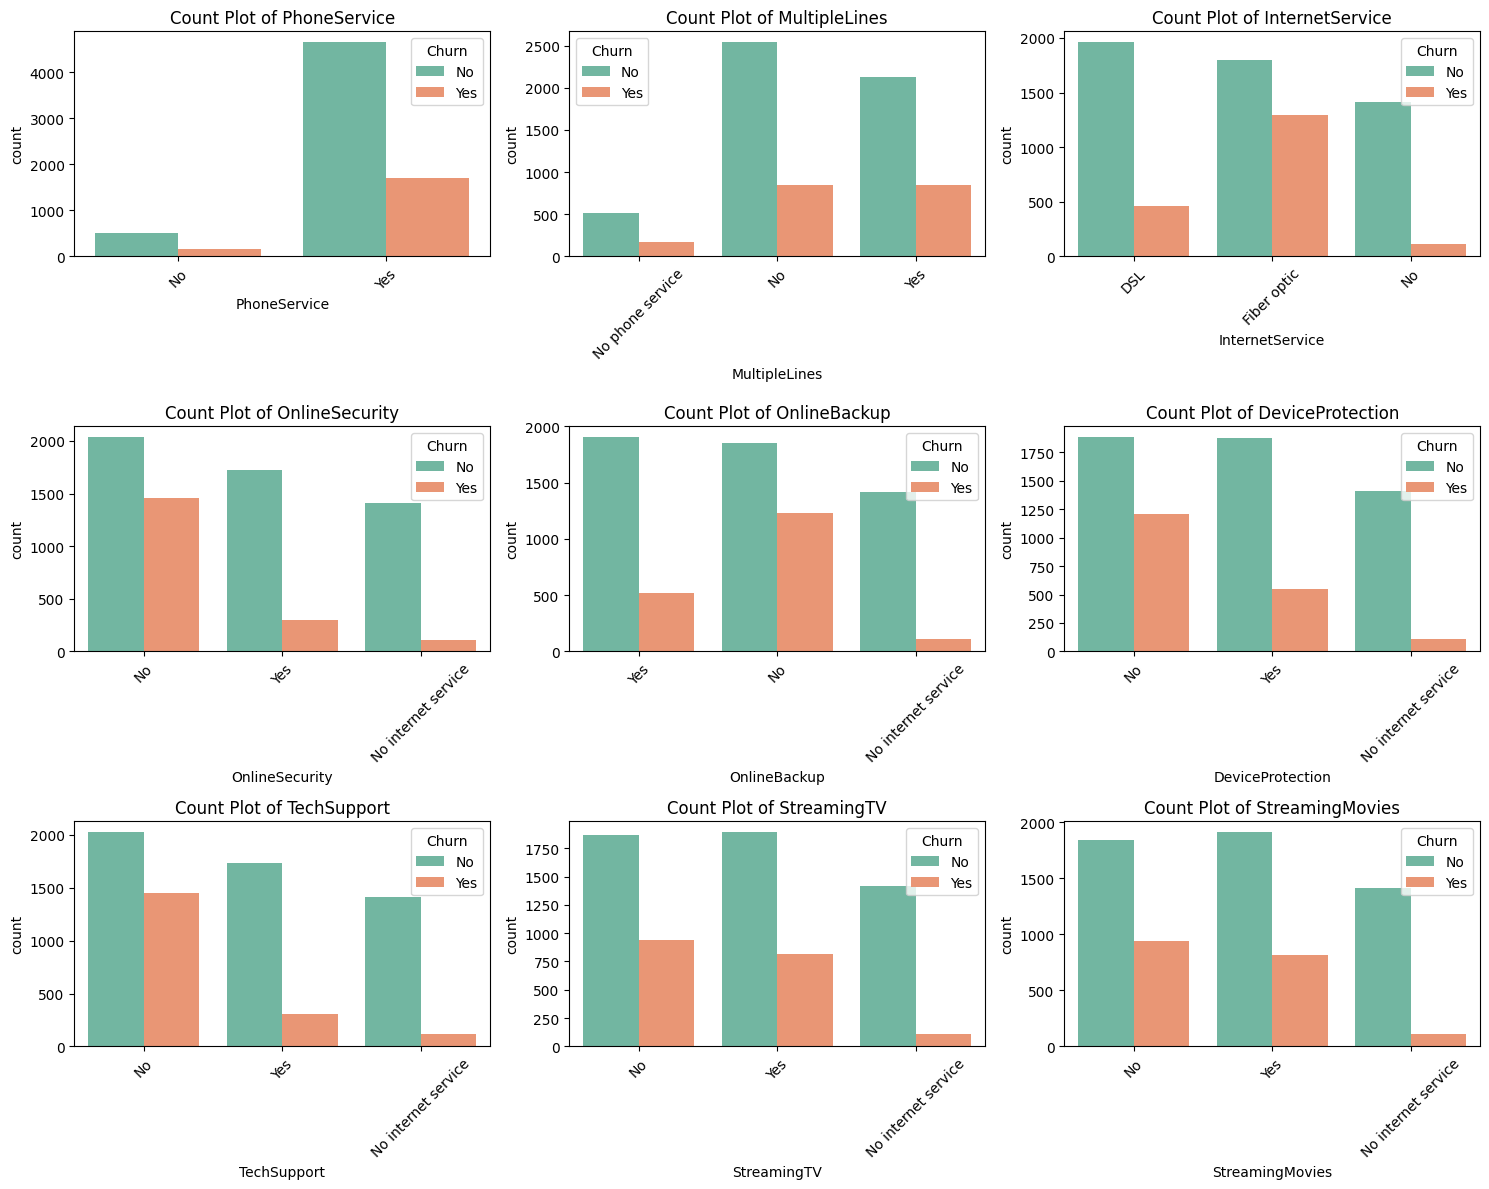

In [57]:
# Your list of columns
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Define the layout of subplots (3 rows x 3 columns for 9 plots)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols

# Set figure size
plt.figure(figsize=(5 * n_cols, 4 * n_rows))

# Create subplots
for idx, col in enumerate(columns, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.countplot(data=df, x=col, palette='Set2', hue = df["Churn"])
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


#The visualizations show the distribution of customer churn across various service categories. Churn is noticeably higher among customers without services like OnlineSecurity, OnlineBackup, TechSupport, and DeviceProtection. Customers without internet service have the lowest churn, while those with fiber optic internet show a higher churn rate. Overall, having additional services seems correlated with lower churn.


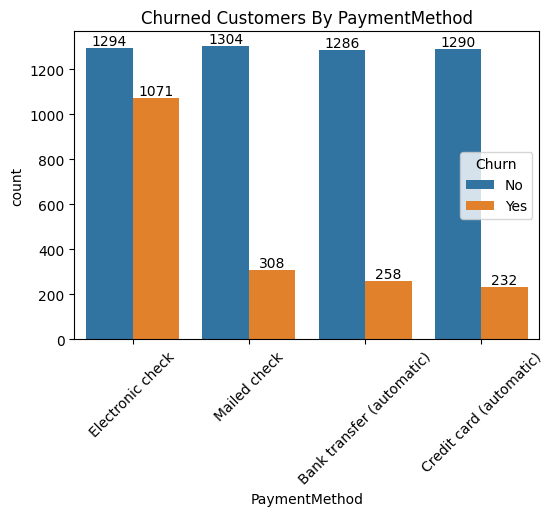

In [62]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers By PaymentMethod")
plt.xticks(rotation = 45)
plt.show()

#Cusromers is likely to churnes when he is useing electronic check as a payment method.